In [1]:
import caiman as cm
import numpy as np
import matplotlib.pyplot as plt
from caiman.source_extraction.cnmf.cnmf import load_CNMF
from pathlib import Path
import pickle
import glob
import gc

2023-03-22 09:09:13.491251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_path = Path("/ceph/imaging1/arie")

sessions ={'429420_toms': ['20230202','20230203','20230210','20230211','20230213','20230214'],
           '429419_croc': ['20230202','20230203','20230210','20230211','20230213','20230214'],
           '441406_fiano':['20230301','20230306','20230307'],
           '441394_ribolla':['20230301','20230306','20230307'],
           '441393_barbaresco': ['20230301','20230306','20230307']}

compute = False
save_results = True


In [3]:
if compute:

    mean_imgs = {}
    frame_avgs = {}

    for animal in sessions.keys():
        mean_imgs[animal] = {}
        frame_avgs[animal] = {}

        for date in sessions[animal]:
            animal_n = animal.split('_')[0]
            session_path = data_path.joinpath(f'{animal}/{date}_{animal_n}')
            print(f'Computing {session_path}')

            try:
                tif_file = glob.glob(str(session_path)+'/*.tif')[0]
                log_file = glob.glob(str(session_path)+'/*.b64')[0]

            except IndexError:
                print('Files not found, skipping session')
                
            try:

                movie = cm.load(tif_file)
                mean_img = np.mean(movie,axis=0)
                fr_avg = np.mean(movie,axis=(1,2))

                if save_results:
                    np.save(f'/ceph/imaging1/davide/2p_data/data_quality/m_img_{animal}_{date}.npy',mean_img)
                    np.save(f'/ceph/imaging1/davide/2p_data/data_quality/f_avg_{animal}_{date}.npy',mean_img)

                mean_imgs[animal][date] = mean_img
                frame_avgs[animal][date] = fr_avg

                del(movie)
                gc.collect()
                
            except Exception:
                print('Error in loading file:')
                print(Exception)
                print('skipping_session')
                continue
            
    if save_results:
        with open('/ceph/imaging1/davide/2p_data/data_quality/mean_imgs.pickle','wb') as file:
            pickle.dump(mean_imgs,file,protocol=pickle.HIGHEST_PROTOCOL)
    
        with open('/ceph/imaging1/davide/2p_data/data_quality/frame_avgs.pickle','wb') as file:
            pickle.dump(frame_avgs,file,protocol=pickle.HIGHEST_PROTOCOL)
            
else:
    
    with open('/ceph/imaging1/davide/2p_data/data_quality/mean_imgs.pickle','rb') as file:
            mean_imgs = pickle.load(file)
            
    with open('/ceph/imaging1/davide/2p_data/data_quality/frame_avgs.pickle','rb') as file:
            frame_avgs = pickle.load(file)
            
    
        
        

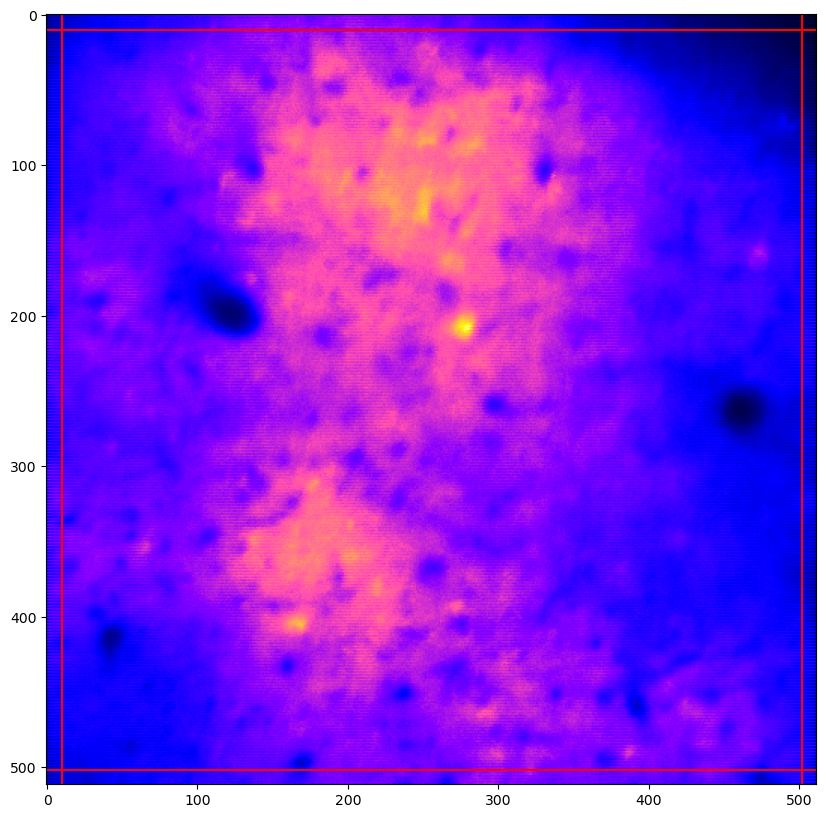

In [23]:
animal = '441394_ribolla'
date = '20230306'

cropping = [10,512-10,10,512-10]

plt.figure(figsize=(10,10))
plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)

plt.axhline(y=cropping[0],c='r')
plt.axhline(y=cropping[1],c='r')
plt.axvline(x=cropping[2],c='r')
plt.axvline(x=cropping[3],c='r')





In [18]:
animal = '429419_croc'
date = '20230206'

cropping = [10, 500, 10,500]

plt.figure(figsize=(10,10))
plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)

plt.axhline(y=cropping[0],c='r')
plt.axhline(y=cropping[1],c='r')
plt.axvline(x=cropping[2],c='r')
plt.axvline(x=cropping[3],c='r')


KeyError: '20230206'

<Figure size 1000x1000 with 0 Axes>

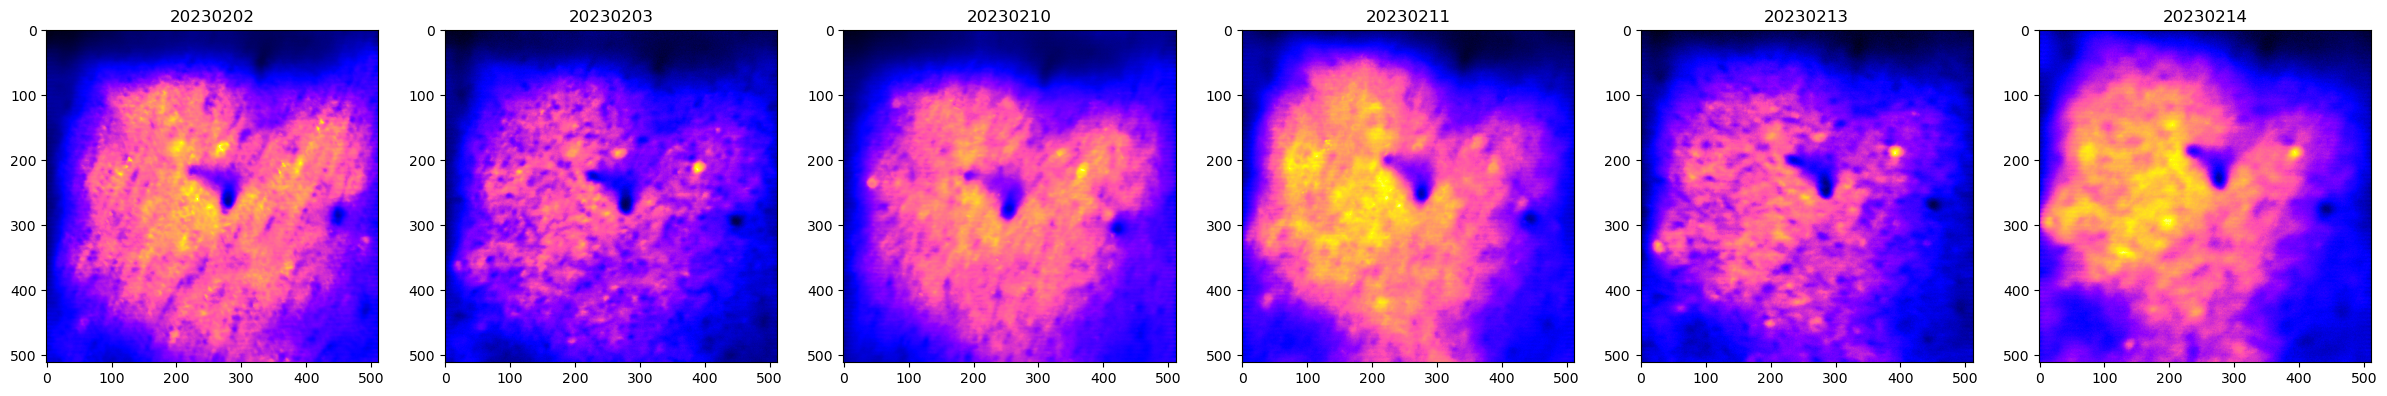

In [4]:
#sessions ={'429420_toms': ['20230202','20230203','20230210','20230211','20230213','20230214'],
#           '429419_croc': ['20230202','20230203','20230210','20230211','20230213','20230214'],
#           '441406_fiano':['20230301','20230306','20230307'],
#          '441394_ribolla':['20230301','20230306','20230307'],
#           '441393_barbaresco': ['20230301','20230306','20230307']}

animal = '441406_fiano'

plt.figure(figsize=(30,5))
for i,date in enumerate(sessions[animal]):
    plt.subplot(1,len(sessions[animal]),i+1)
    plt.title(date)
    plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)
    

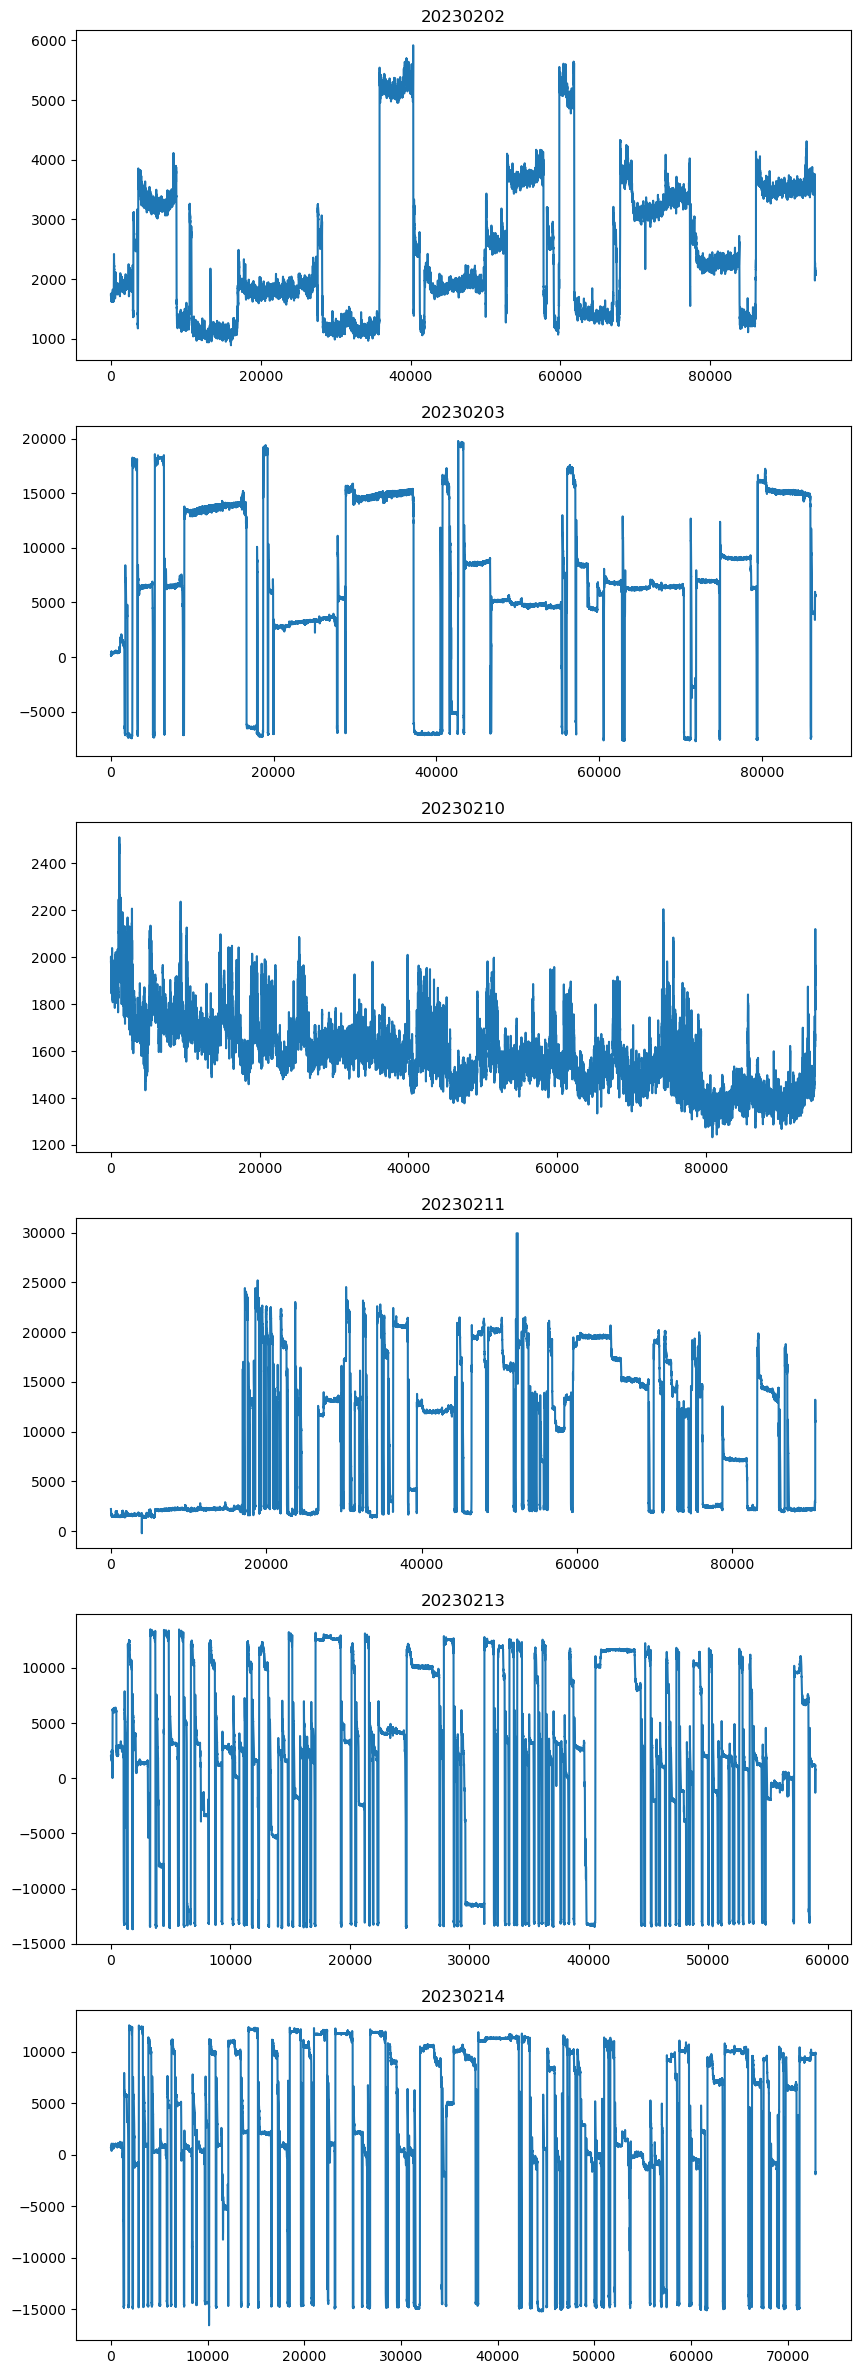

In [5]:
plt.figure(figsize=(10,30))
for i,date in enumerate(sessions[animal]):
    plt.subplot(len(sessions[animal]),1,i+1)
    plt.title(date)
    plt.plot(frame_avgs[animal][date])

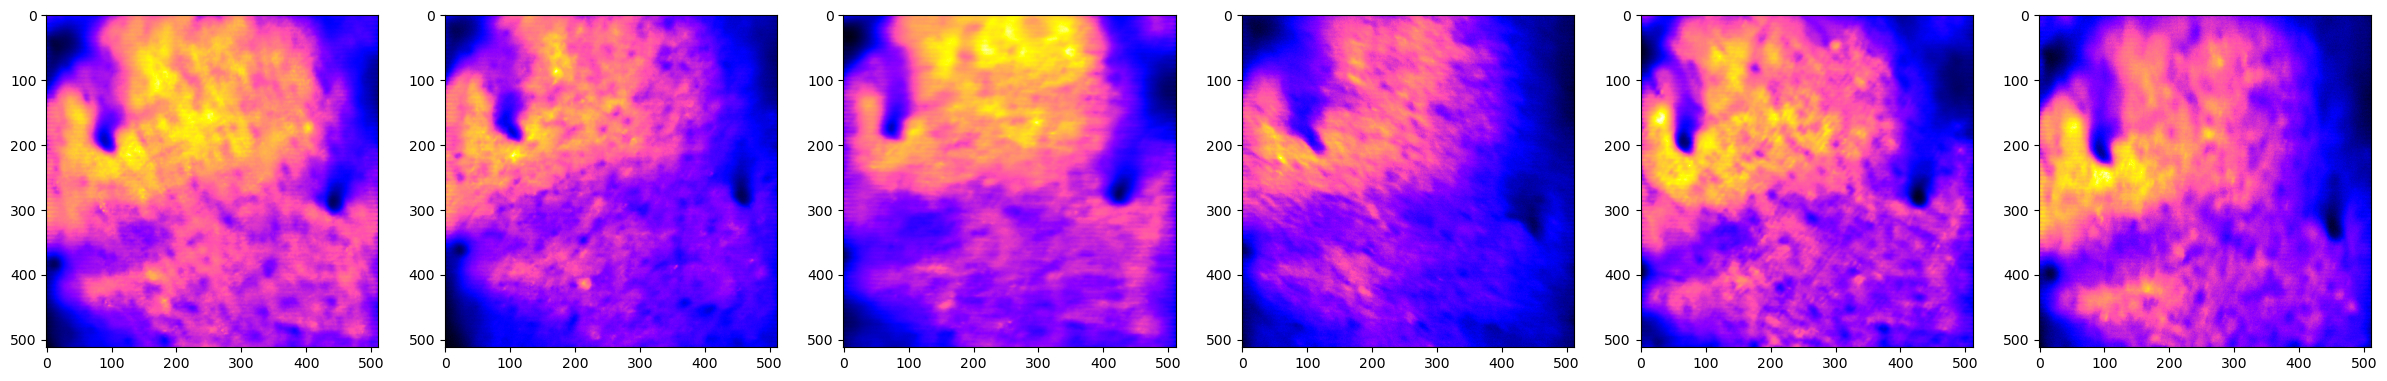

In [10]:
animal = '429419_croc'

plt.figure(figsize=(30,5))
for i,date in enumerate(sessions[animal]):
    plt.subplot(1,len(sessions[animal]),i+1)
    plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)

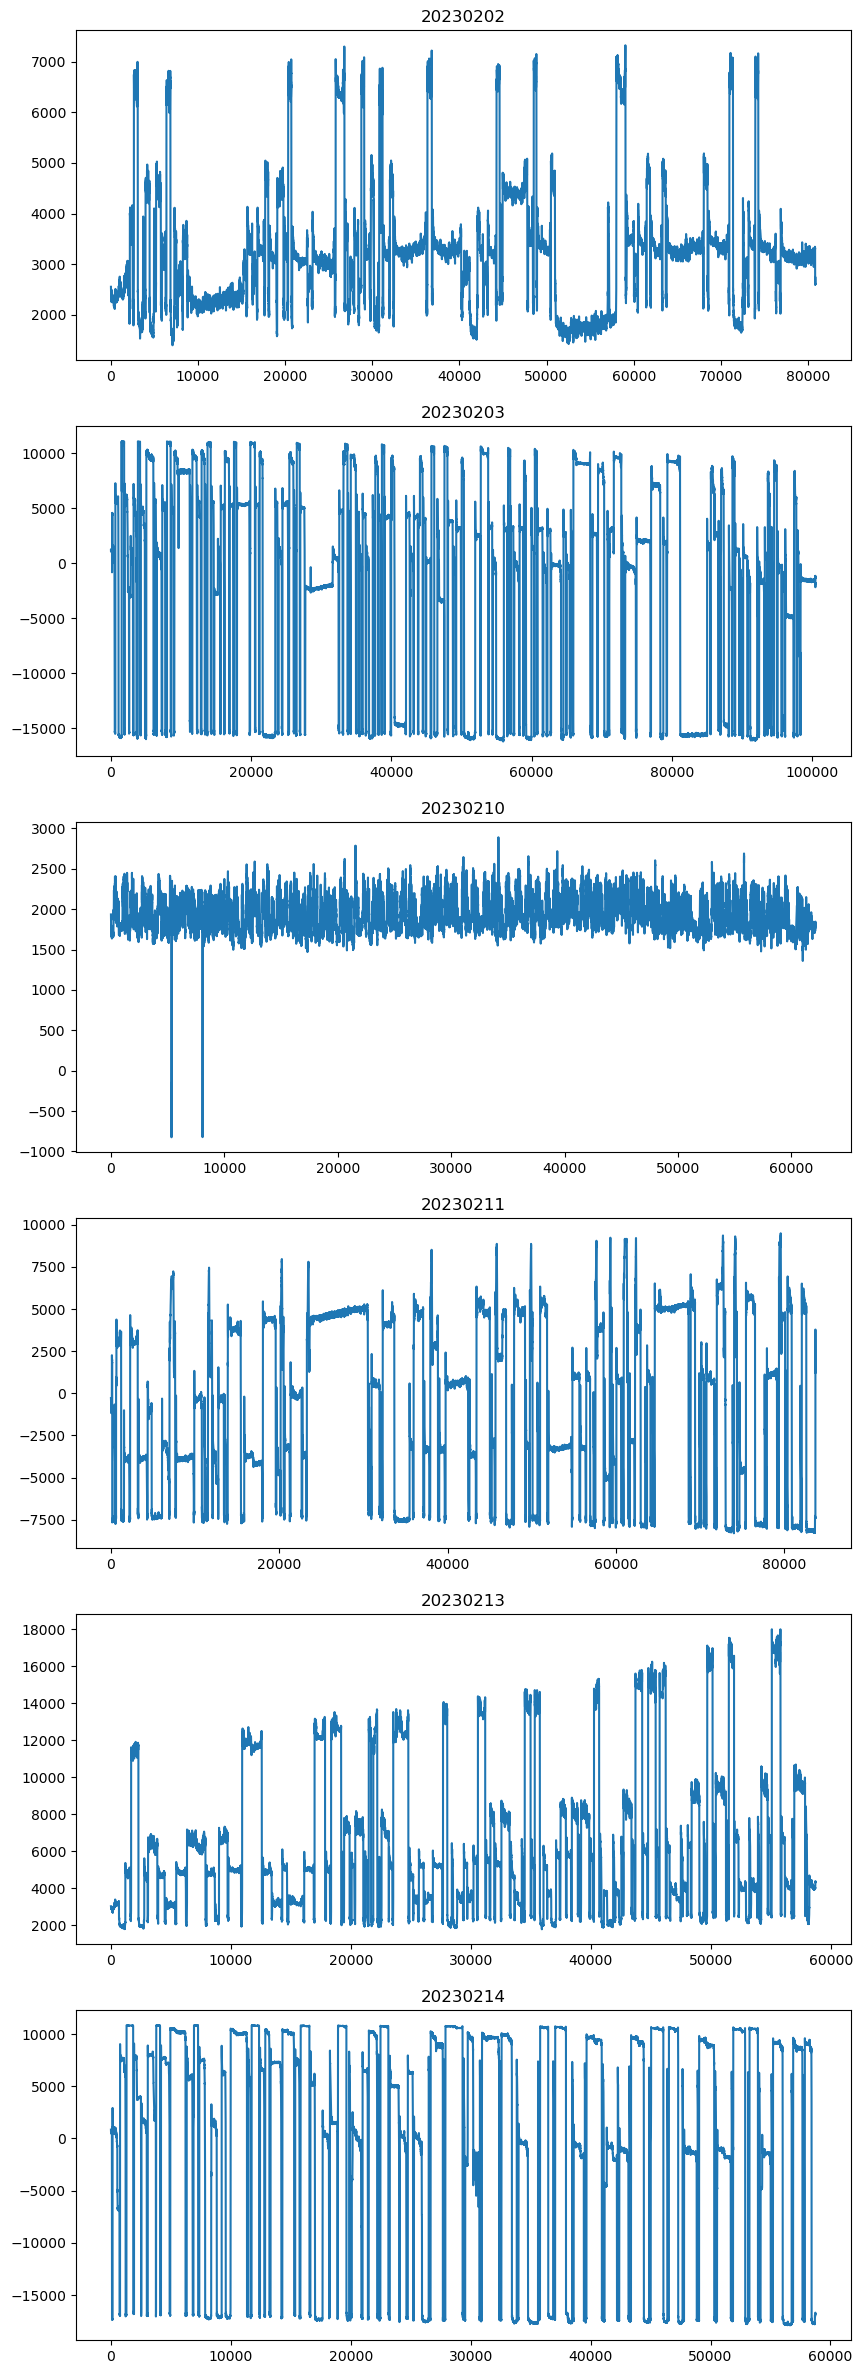

In [38]:
animal = '429419_croc'

plt.figure(figsize=(10,30))
for i,date in enumerate(sessions[animal]):
    plt.subplot(len(sessions[animal]),1,i+1)
    plt.title(date)
    plt.plot(frame_avgs[animal][date])

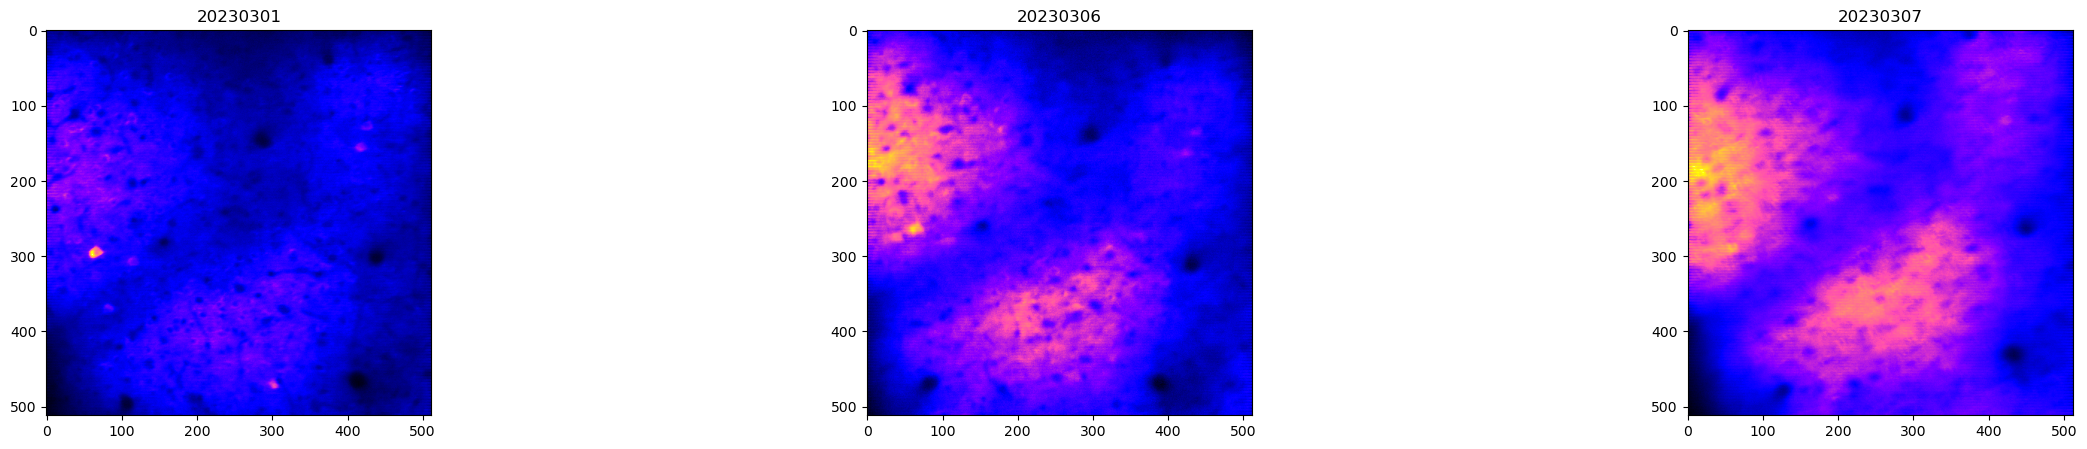

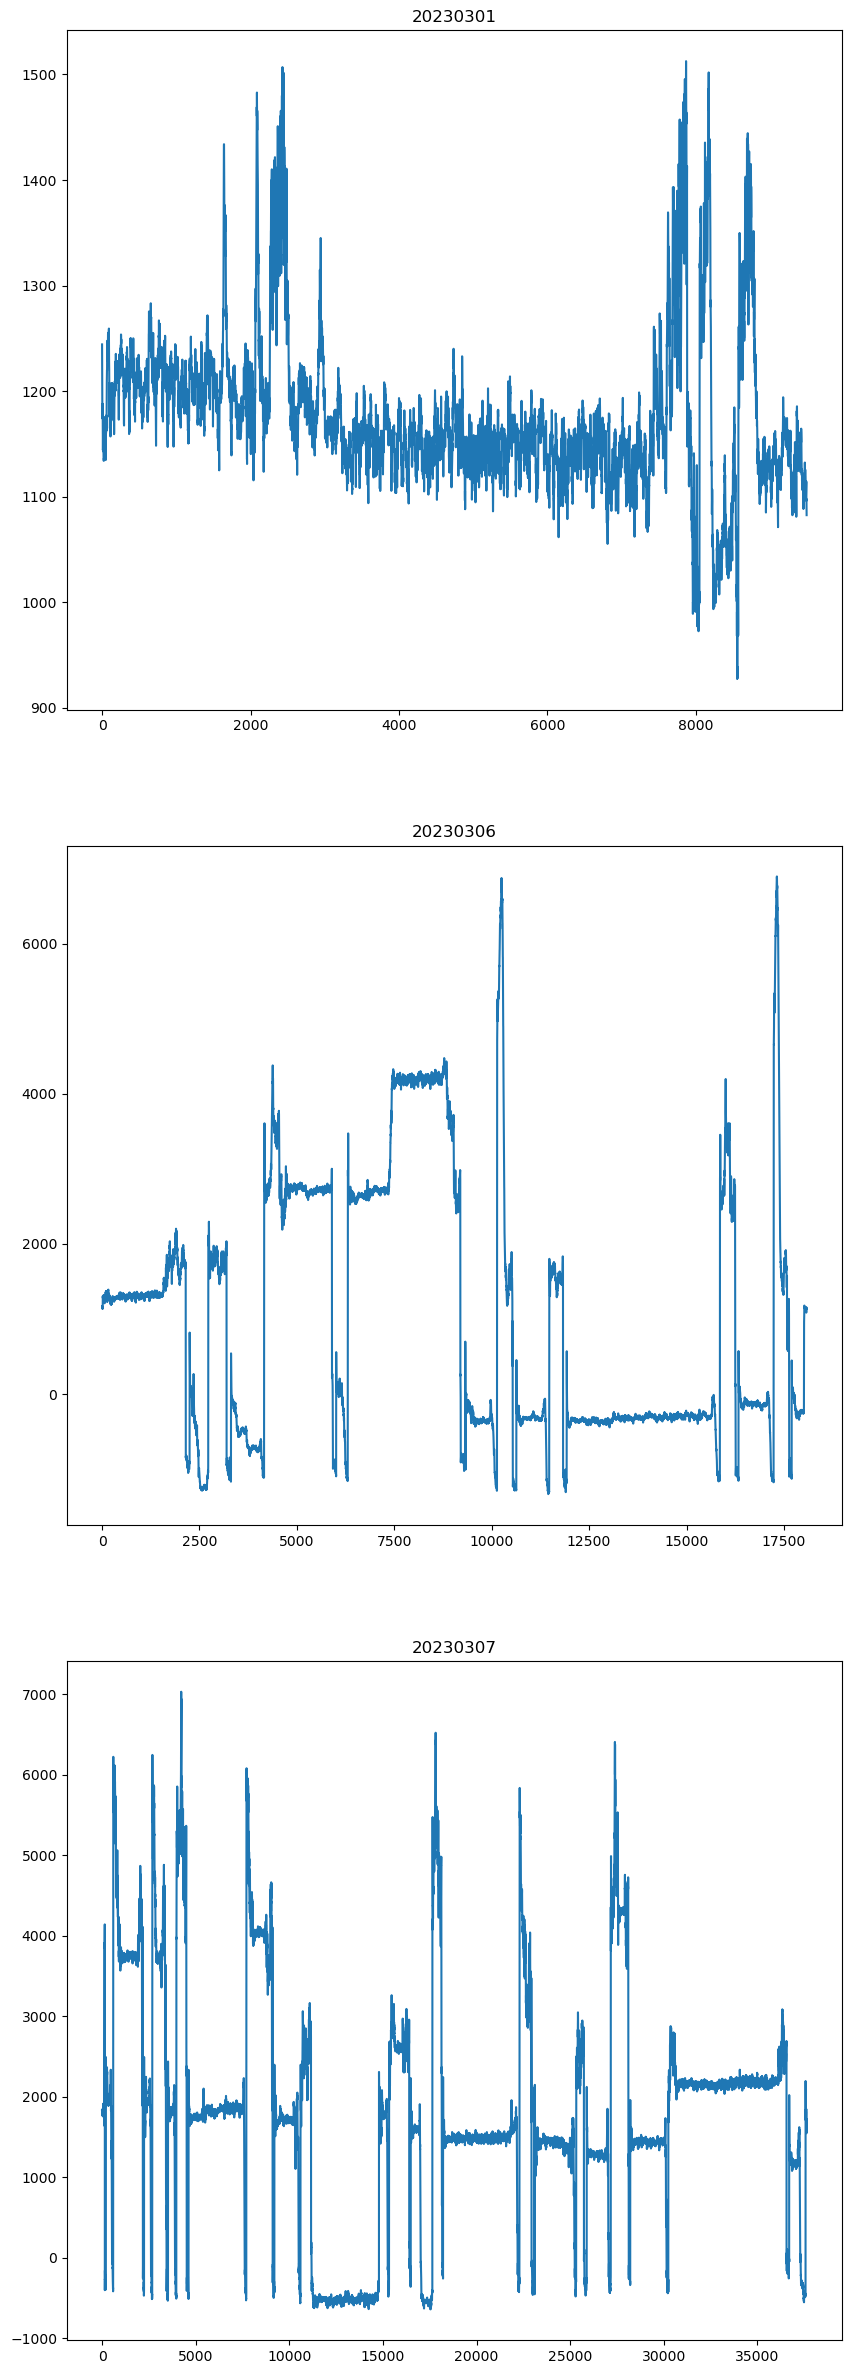

In [8]:
#sessions ={'429420_toms': ['20230202','20230203','20230210','20230211','20230213','20230214'],
#           '429419_croc': ['20230202','20230203','20230210','20230211','20230213','20230214'],
#           '441406_fiano':['20230301','20230306','20230307'],
#          '441394_ribolla':['20230301','20230306','20230307'],
#           '441393_barbaresco': ['20230301','20230306','20230307']}

animal = '441406_fiano'

plt.figure(figsize=(30,5))
for i,date in enumerate(sessions[animal]):
    plt.subplot(1,len(sessions[animal]),i+1)
    plt.title(date)
    plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)
    
plt.figure(figsize=(10,30))
for i,date in enumerate(sessions[animal]):
    plt.subplot(len(sessions[animal]),1,i+1)
    plt.title(date)
    plt.plot(frame_avgs[animal][date])

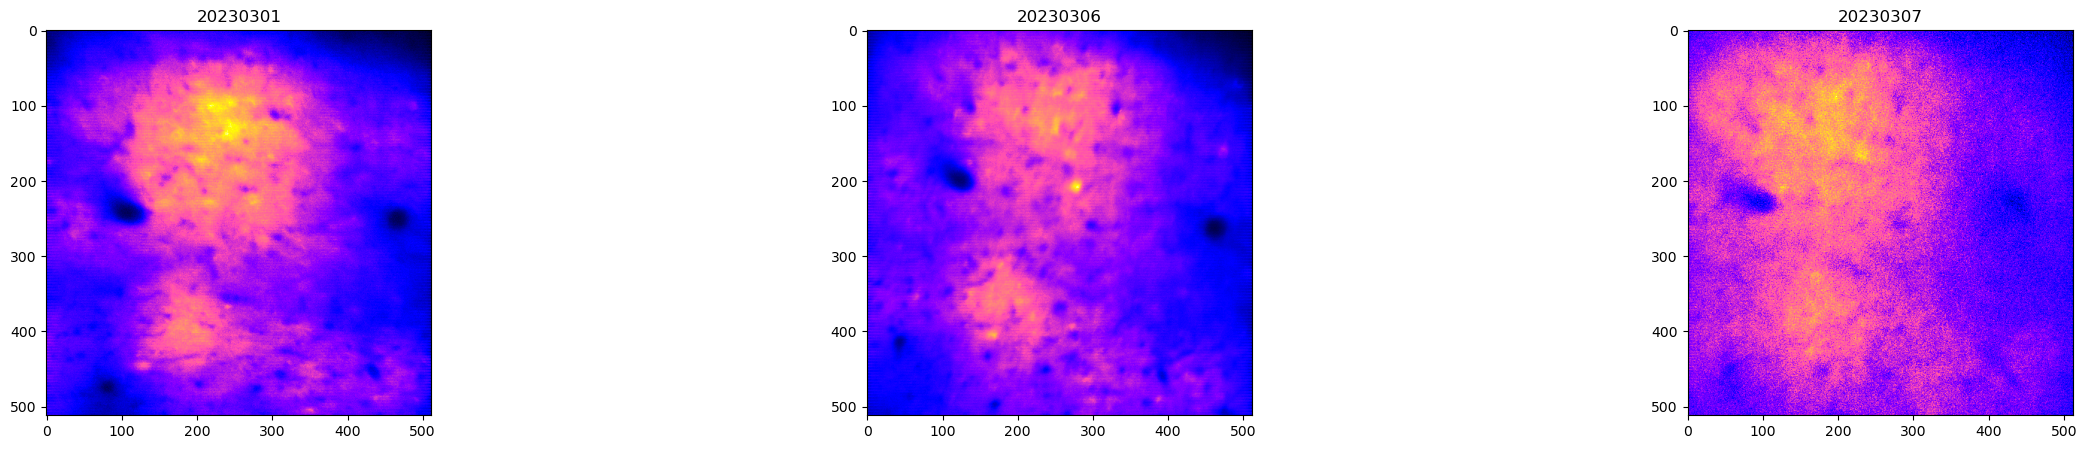

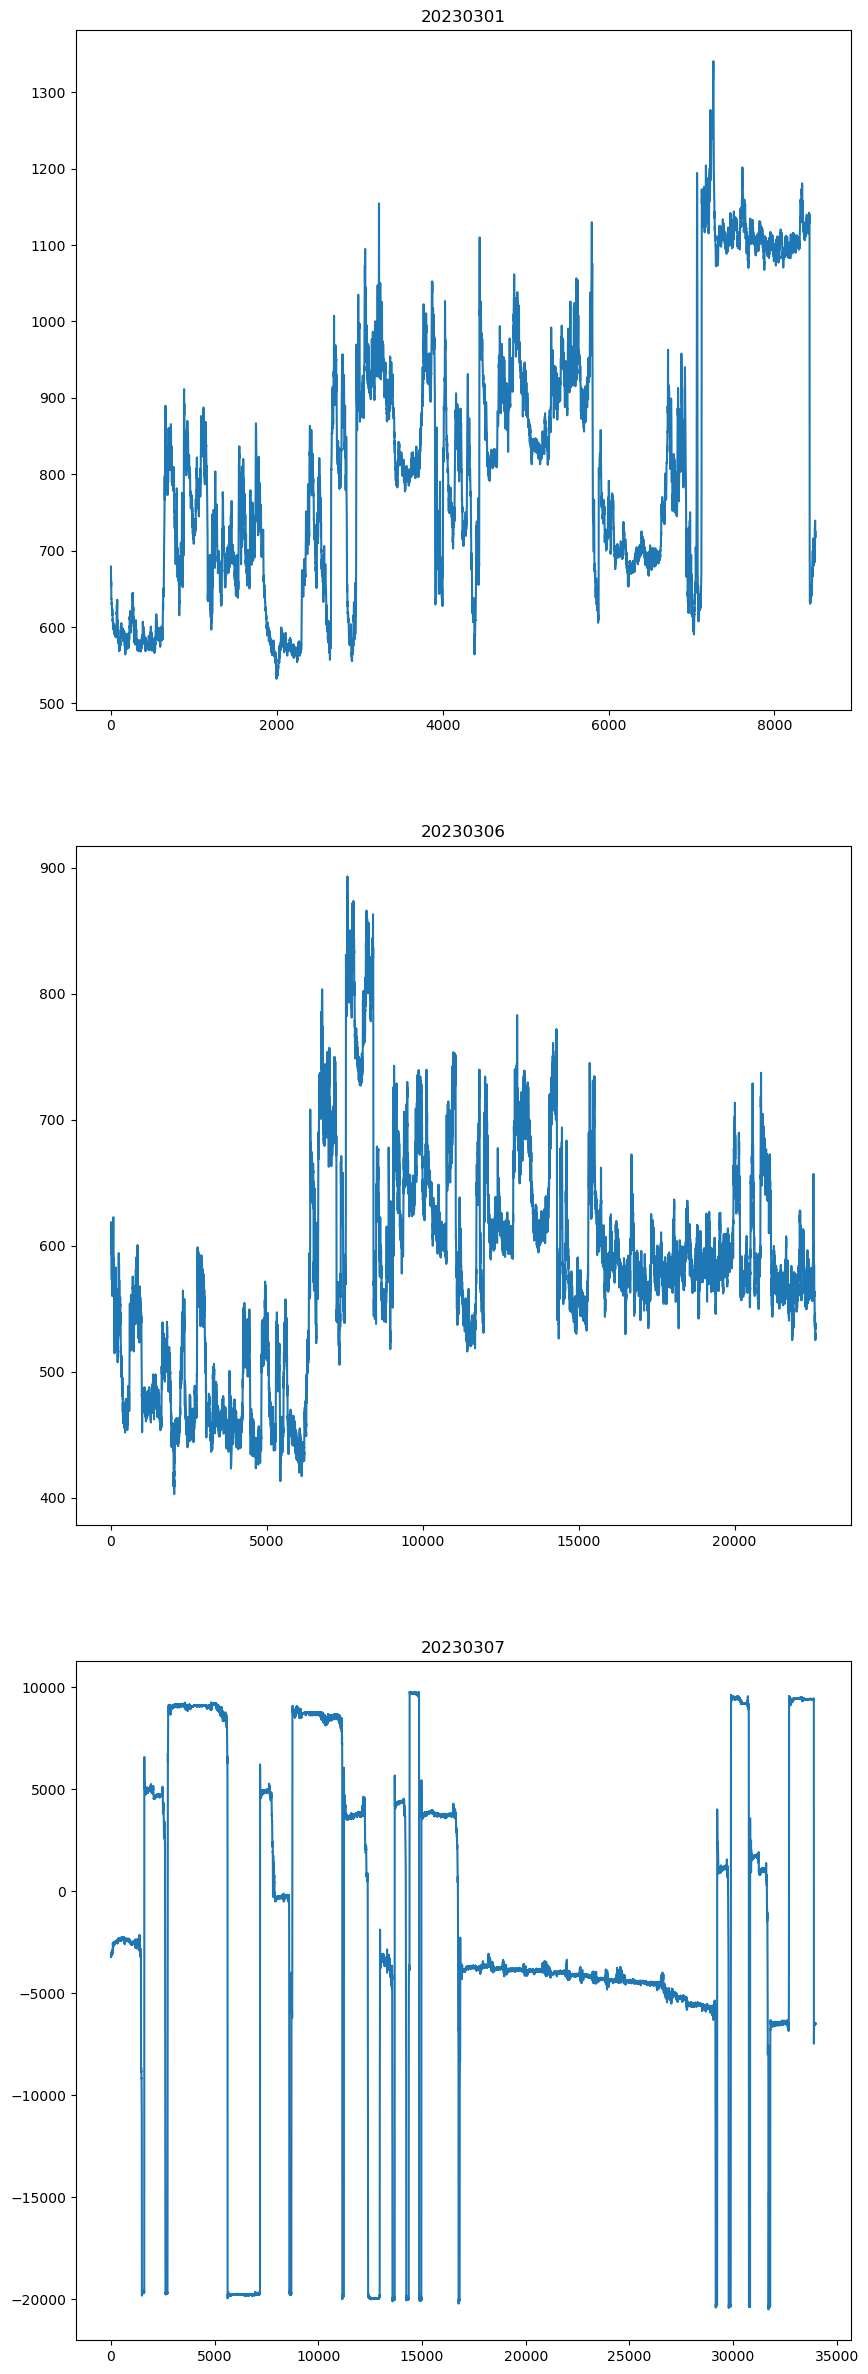

In [9]:
#sessions ={'429420_toms': ['20230202','20230203','20230210','20230211','20230213','20230214'],
#           '429419_croc': ['20230202','20230203','20230210','20230211','20230213','20230214'],
#           '441406_fiano':['20230301','20230306','20230307'],
#          '441394_ribolla':['20230301','20230306','20230307'],
#           '441393_barbaresco': ['20230301','20230306','20230307']}

animal = '441394_ribolla'

plt.figure(figsize=(30,5))
for i,date in enumerate(sessions[animal]):
    plt.subplot(1,len(sessions[animal]),i+1)
    plt.title(date)
    plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)
    
plt.figure(figsize=(10,30))
for i,date in enumerate(sessions[animal]):
    plt.subplot(len(sessions[animal]),1,i+1)
    plt.title(date)
    plt.plot(frame_avgs[animal][date])

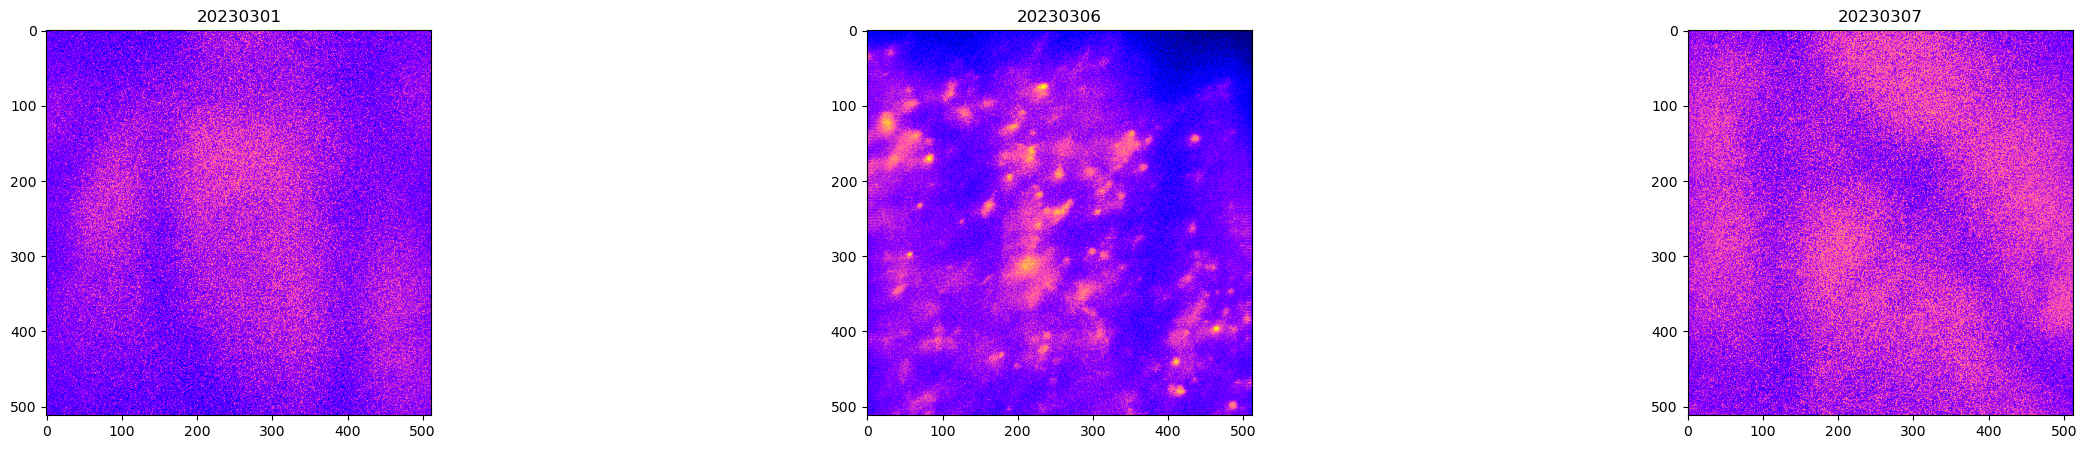

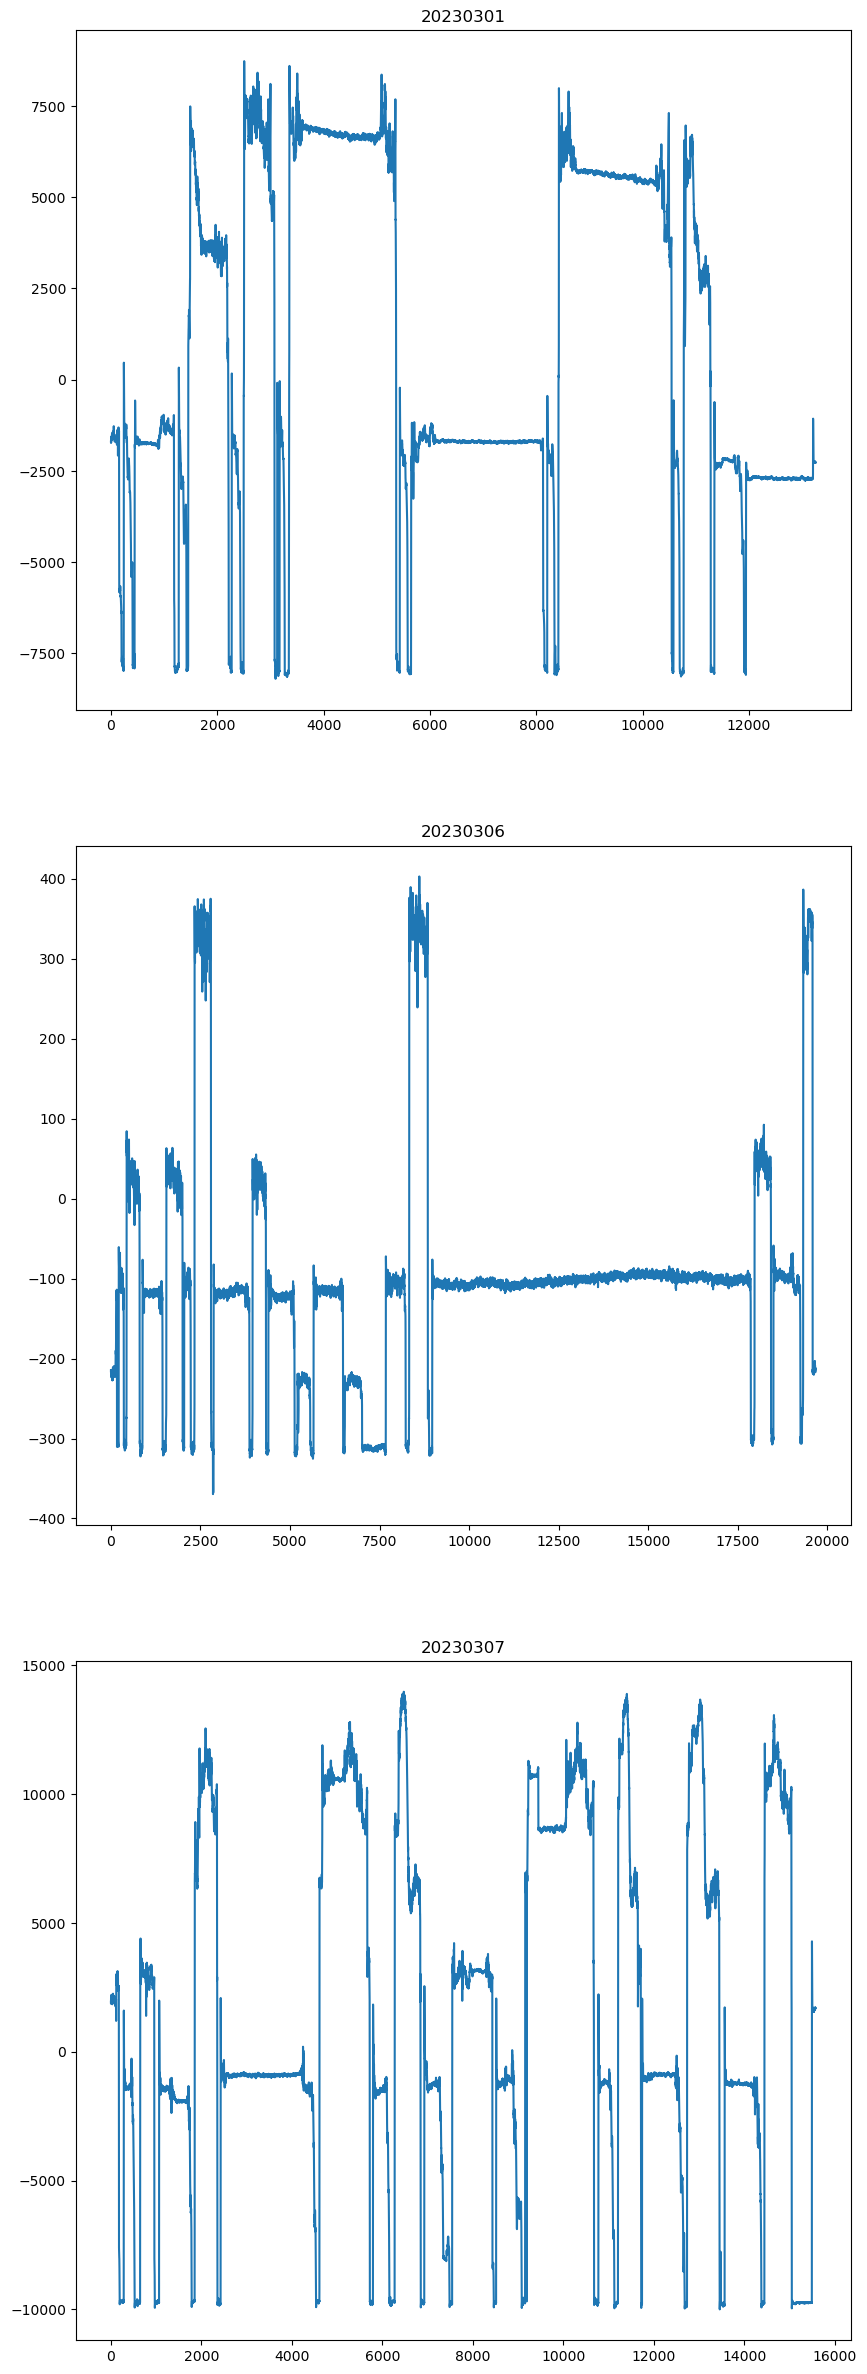

In [11]:
#sessions ={'429420_toms': ['20230202','20230203','20230210','20230211','20230213','20230214'],
#           '429419_croc': ['20230202','20230203','20230210','20230211','20230213','20230214'],
#           '441406_fiano':['20230301','20230306','20230307'],
#          '441394_ribolla':['20230301','20230306','20230307'],
#           '441393_barbaresco': ['20230301','20230306','20230307']}

animal = '441393_barbaresco'

plt.figure(figsize=(30,5))
for i,date in enumerate(sessions[animal]):
    plt.subplot(1,len(sessions[animal]),i+1)
    plt.title(date)
    plt.imshow(mean_imgs[animal][date],cmap=plt.cm.gnuplot2)
    
plt.figure(figsize=(10,30))
for i,date in enumerate(sessions[animal]):
    plt.subplot(len(sessions[animal]),1,i+1)
    plt.title(date)
    plt.plot(frame_avgs[animal][date])

# Data type comparison

In [29]:
animal = '429420_toms'
date = '20230214'
animal_n = animal.split('_')[0]


session_path = data_path.joinpath(f'{animal}/{date}_{animal_n}')
print(f'Computing {session_path}')

try:
    tif_file = glob.glob(str(session_path)+'/*.tif')[0]
    log_file = glob.glob(str(session_path)+'/*.b64')[0]

except IndexError:
    print('Files not found, skipping session')


movie = cm.load(tif_file,subindices=np.arange(1000),outtype='uint16')
movie.shape
#mean_img = np.mean(movie,axis=0)
#fr_avg = np.mean(movie,axis=(1,2))

Computing /ceph/imaging1/arie/429420_toms/20230214_429420


(1000, 512, 512)

In [36]:
movie1 = cm.load(tif_file,subindices=np.arange(1000))
movie1.shape

(1000, 512, 512)

In [37]:
mean_img = np.mean(movie,axis=0)
fr_avg = np.mean(movie,axis=(1,2))

mean_img1 = np.mean(movie1,axis=0)
fr_avg1 = np.mean(movie1,axis=(1,2))

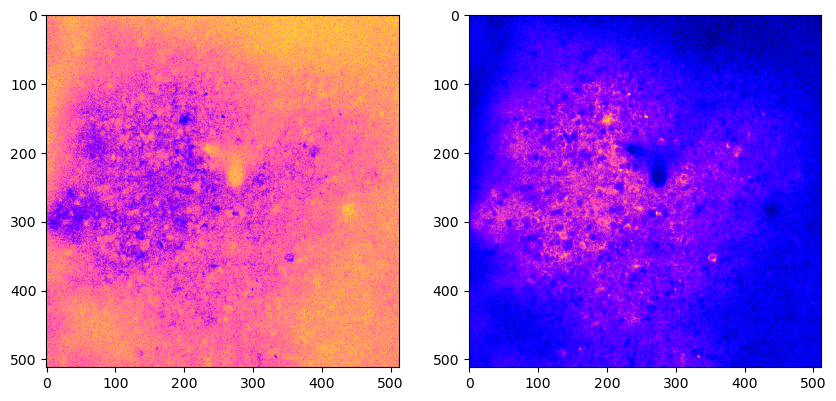

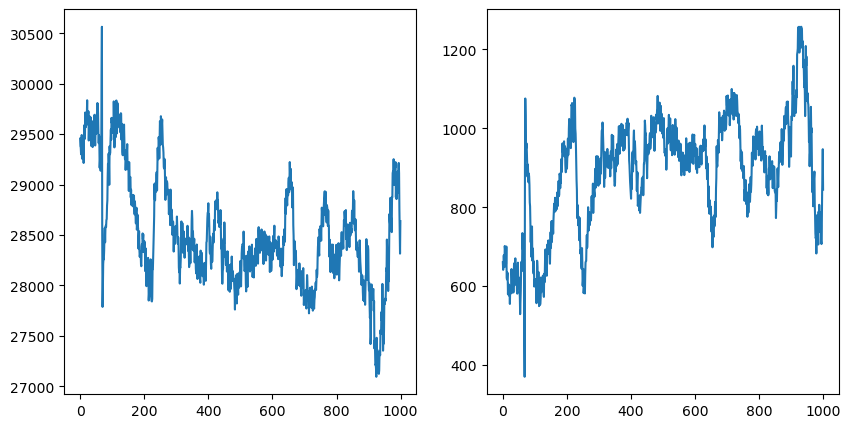

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(mean_img,cmap=plt.cm.gnuplot2)
plt.subplot(1,2,2)
plt.imshow(mean_img1,cmap=plt.cm.gnuplot2)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(fr_avg)

plt.subplot(1,2,2)
plt.plot(fr_avg1)

In [30]:
# make an image widget
from fastplotlib import ImageWidget, Plot, GridPlot
from ipywidgets import VBox, IntSlider, Layout

movies = [movie]

iw = ImageWidget(
    movies, 
    window_funcs={"t": (np.mean, 100)},
    vmin_vmax_sliders=True,
    cmap="Greys"
)

iw.show()

RFBOutputContext()